# **K means clustering**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

Read the image:

In [4]:
img = cv2.imread('image.jpg')
img_size = img.shape

Reshape it to be 2-dimension:

In [5]:
X = img.reshape(img_size[0] * img_size[1], img_size[2])		# Turn hxwx3 into (h*w)x3

## SECTION D

Run the Kmeans algorithm:

In [6]:
km = KMeans(n_clusters=20)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

Use the centroids to compress the image:

In [7]:
img_compressed = km.cluster_centers_[km.labels_]
img_compressed = np.clip(img_compressed.astype('uint8'), 0, 255)

Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3:

In [8]:
img_compressed = img_compressed.reshape(img_size[0], img_size[1], img_size[2])

Plot the original and the compressed image next to each other:

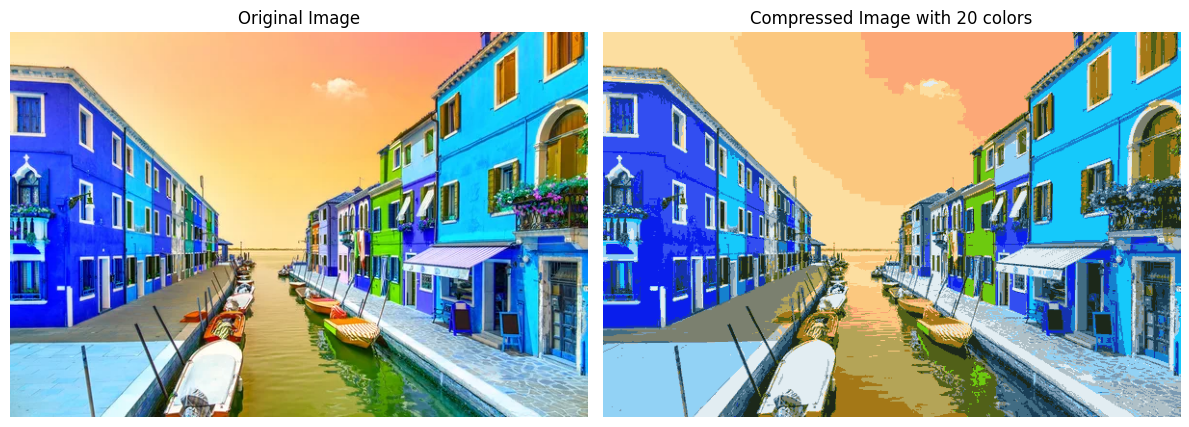

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(img_compressed)
ax[1].set_title(f'Compressed Image with {km.n_clusters} colors')

for ax in fig.axes:
    ax.axis('off')

plt.tight_layout()
plt.show()